# About this project
This project revolves around using data from a manufacturing company's industrial devices. The data helps predict when these devices need maintenance, preventing breakdowns and saving money. As companies grow, keeping track of maintenance manually becomes hard. So, we propose a smart solution: using data from sensors to predict when maintenance is needed.

The goal is to analyze the data from these sensors to figure out the best time to do maintenance on the devices. We'll use advanced techniques to do this efficiently

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore

In [3]:
df = pd.read_csv('predictive_maintenance.csv')

In [4]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [6]:
df.apply(lambda x: x.nunique())

UDI                        10000
Product ID                 10000
Type                           3
Air temperature [K]           93
Process temperature [K]       82
Rotational speed [rpm]       941
Torque [Nm]                  577
Tool wear [min]              246
Target                         2
Failure Type                   6
dtype: int64

In [7]:
df.columns = ['UDI', 'Product ID', 'Type', 'Air temperature', 'Process temperature', 'Rotational speed', 'Torque', 'Tool wear', 'Target', 'Failure type']

In [8]:
df.iloc[:,-1].unique()

array(['No Failure', 'Power Failure', 'Tool Wear Failure',
       'Overstrain Failure', 'Random Failures',
       'Heat Dissipation Failure'], dtype=object)

In [9]:
df.iloc[:,-8].unique()


array(['M', 'L', 'H'], dtype=object)

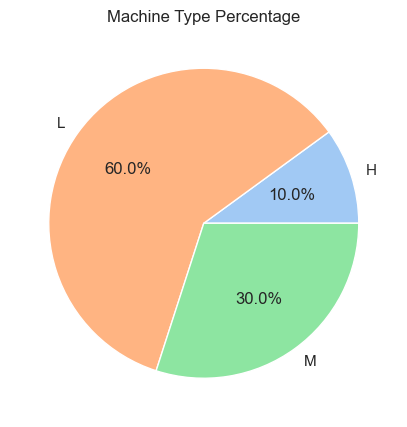

In [10]:
product_type = df[['Product ID','Type']].groupby('Type').count().reset_index()

sns.set(rc={'figure.figsize':(5,6)})
colors = sns.color_palette('pastel')
g = plt.pie(x=product_type['Product ID'],
    labels=product_type['Type'],colors = colors, autopct='%.1f%%')

plt.title("Machine Type Percentage")
plt.show()

In [11]:
num_cols = ['Air temperature', 'Process temperature', 'Rotational speed','Torque', 'Tool wear']
cat_cols = ['Type', 'Failure type']
label = 'Target'
df

,UDI,Product ID,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Target,Failure type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


# DATA VISUALIZATIONS

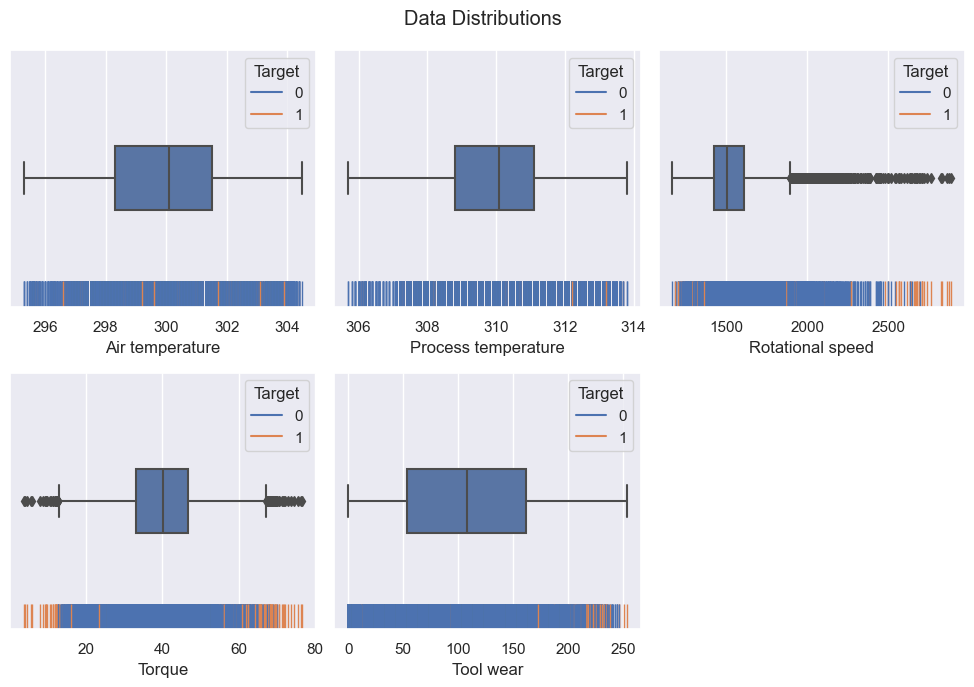

In [12]:
plt.figure(figsize = (10, 7))
for i, col in enumerate(num_cols):
    plt.subplot(2,3, i+1)
    sns.rugplot(df, x = col, hue = label, height = 0.1)
    sns.boxplot(df, x = col, width = 0.25)
plt.suptitle("Data Distributions")
plt.tight_layout()
plt.show()

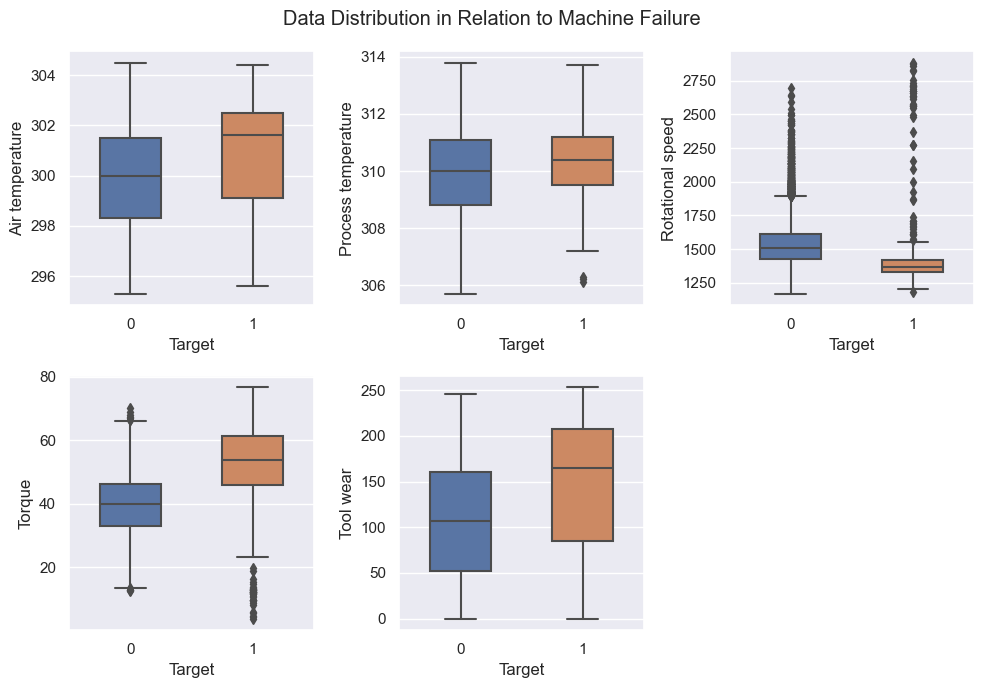

In [13]:
plt.figure(figsize = (10, 7))
for i, col in enumerate(num_cols):
    plt.subplot(2,3, i+1)
    sns.boxplot(df, x = label, y = col, width = 0.5)
plt.suptitle("Data Distribution in Relation to Machine Failure")
plt.tight_layout()
plt.show()

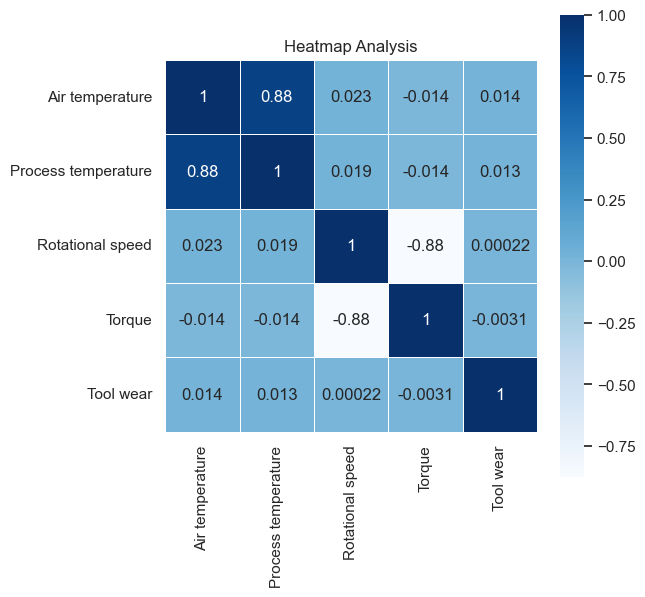

In [14]:
plt.figure(figsize = (6,6))
sns.heatmap(df[num_cols].corr(), square = True, annot = True, cmap = 'Blues', linewidths = 0.5)
plt.title("Heatmap Analysis")
plt.show()

# DATA PREPROCESSING

In [15]:
df = df.drop(columns=['Product ID', 'Target'])

In [16]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Type_Encoded'] = label_encoder.fit_transform(df['Type'])
print("Unique encoded values for 'Type':", df['Type_Encoded'].unique())


Unique encoded values for 'Type': [2 1 0]


In [17]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Failure_Type'] = label_encoder.fit_transform(df['Failure type'])
print("Unique encoded values for 'Failure Type':", df['Failure_Type'].unique())


Unique encoded values for 'Failure Type': [1 3 5 2 4 0]


In [18]:
# Drop the specified columns inplace
df.drop(columns=['Failure type', 'Type'], inplace=True)

In [19]:
target = df[['Failure_Type']]
features = df.drop(columns = ['Failure_Type'])
print(df)

        UDI  Air temperature  Process temperature  Rotational speed  Torque  \
0         1            298.1                308.6              1551    42.8   
1         2            298.2                308.7              1408    46.3   
2         3            298.1                308.5              1498    49.4   
3         4            298.2                308.6              1433    39.5   
4         5            298.2                308.7              1408    40.0   
...     ...              ...                  ...               ...     ...   
9995   9996            298.8                308.4              1604    29.5   
9996   9997            298.9                308.4              1632    31.8   
9997   9998            299.0                308.6              1645    33.4   
9998   9999            299.0                308.7              1408    48.5   
9999  10000            299.0                308.7              1500    40.2   

      Tool wear  Type_Encoded  Failure_Type  
0    

# TEST AND TRAIN THE MODEL

In [20]:
X_train, X_test, y_train, y_test = train_test_split(features,target,  test_size = 0.20, random_state=42)

In [21]:
#pip install xgboost

In [22]:
from xgboost import XGBClassifier

xgb = XGBClassifier(booster='gbtree',
                    n_estimators = 100,
                    max_depth = 5,
                    learning_rate = 0.05,
                    subsample = 0.8,
                    objective='multi:softmax',
                    num_class=4,
                    random_state=0)

In [23]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, num_class=4,
              num_parallel_tree=None, ...)

In [24]:
y_pred = xgb.predict(X_test)

In [25]:
print(accuracy_score(y_test, y_pred))

0.981


In [26]:
y_pred = xgb.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 3, 1])

In [27]:
st = xgb.predict([[ 1,298.1,308.6,1551,42.8,0 ,2]])
st


array([1])

# SAVE THE MODEL FILE

In [28]:
import joblib

# Assuming 'model' is your trained XGBoost classifier
joblib.dump(xgb, 'xgb_model.pkl')


['xgb_model.pkl']

In [29]:
import joblib
model = joblib.load('xgb_model.pkl')
